In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from matplotlib import pyplot as pl

In [2]:
nf = pd.read_csv("../Opdracht_4/netflix_titles.csv")

## Confidence intervals

In [3]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Confidence intervals op hoeveel films welke lengte hebben

#### Grafiek

Text(0, 0.5, 'Amount')

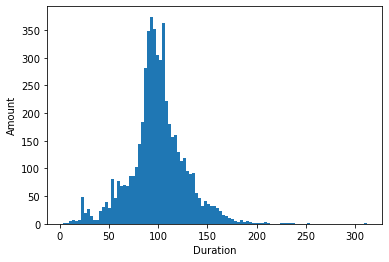

In [4]:
def convertString(str):
    return int(str.split(" ")[0])

durations = nf.duration[nf.type == "Movie"]

converted_durations = []

for v in durations:
    converted_durations.append(convertString(v))

pl.hist(converted_durations, bins=101)
pl.xlabel("Duration")
pl.ylabel("Amount")

#### Confidence intervals

Confidence met 90%

In [5]:
durations_dataframe = pd.DataFrame(converted_durations)
sp.t.interval(0.9, len(converted_durations) - 1, loc=durations_dataframe.mean(), scale=sp.sem(durations_dataframe))

(array([98.66787926]), array([99.94807759]))

Confidence met 95%

In [6]:
durations_dataframe = pd.DataFrame(converted_durations)
sp.t.interval(0.95, len(converted_durations) - 1, loc=durations_dataframe.mean(), scale=sp.sem(durations_dataframe))

(array([98.54521293]), array([100.07074392]))

Confidence met 99%

In [7]:
durations_dataframe = pd.DataFrame(converted_durations)
sp.t.interval(0.99, len(converted_durations) - 1, loc=durations_dataframe.mean(), scale=sp.sem(durations_dataframe))

(array([98.30540438]), array([100.31055248]))

Confidence met 99.99%

In [8]:
durations_dataframe = pd.DataFrame(converted_durations)
sp.t.interval(0.9999, len(converted_durations) - 1, loc=durations_dataframe.mean(), scale=sp.sem(durations_dataframe))

(array([97.79306844]), array([100.82288842]))

### Confidence met 10% van de data

#### Grafiek

In [9]:
first_10p = converted_durations[:int(len(converted_durations) * 0.1)]

Text(0, 0.5, 'Amount')

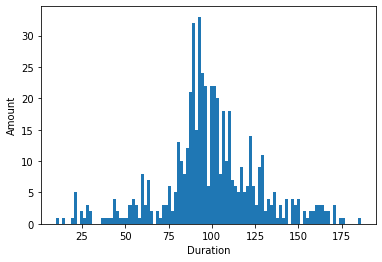

In [10]:
pl.hist(first_10p, bins=101)
pl.xlabel("Duration")
pl.ylabel("Amount")

#### Confidence

In [11]:
first_10p_dataframe = pd.DataFrame(first_10p)
sp.t.interval(0.95, len(first_10p_dataframe) - 1, loc=first_10p_dataframe.mean(), scale=sp.sem(first_10p_dataframe))

(array([96.84337747]), array([101.67431341]))

### Confidence interval op hoeveel films er paar jaar zijn gemaakt

#### Grafiek

Text(0.5, 1.0, 'Amount of films per year')

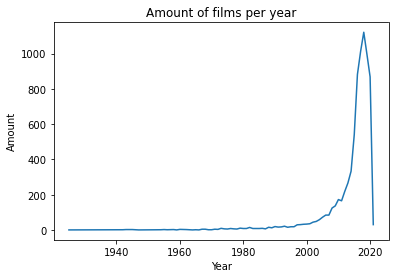

In [12]:
years = nf.release_year.unique()
filmsList = []

years.sort()

for year in years:
    amount = len(nf[nf.release_year == year])
    filmsList.append(amount)
    
pl.plot(years, filmsList)
pl.xlabel("Year")
pl.ylabel("Amount")
pl.title("Amount of films per year")

#### Confidence interval op amount of films per jaar

Confidence met 90%

In [13]:
films_list_dataframe = pd.DataFrame(filmsList)
sp.t.interval(0.9, len(filmsList) - 1, loc=films_list_dataframe.mean(), scale=sp.sem(films_list_dataframe))

(array([57.2303728]), array([156.11209296]))

In [14]:
films_list_dataframe.mean()

0    106.671233
dtype: float64

Confidence met 95%

In [15]:
films_list_dataframe = pd.DataFrame(filmsList)
sp.t.interval(0.95, len(filmsList) - 1, loc=films_list_dataframe.mean(), scale=sp.sem(films_list_dataframe))

(array([47.52286456]), array([165.81960119]))

Confidence met 99%

In [16]:
films_list_dataframe = pd.DataFrame(filmsList)
sp.t.interval(0.99, len(filmsList) - 1, loc=films_list_dataframe.mean(), scale=sp.sem(films_list_dataframe))

(array([28.16574833]), array([185.17671743]))

Confidence met 99.99%

In [17]:
films_list_dataframe = pd.DataFrame(filmsList)
sp.t.interval(0.9999, len(filmsList) - 1, loc=films_list_dataframe.mean(), scale=sp.sem(films_list_dataframe))

(array([-15.5701918]), array([228.91265756]))

### Confidence met 10% van de data

In [18]:
f10p = filmsList[:int(len(filmsList) * 0.1)]

In [19]:
f10p_df = pd.DataFrame(f10p)
sp.t.interval(0.95, len(f10p_df) - 1, loc=f10p_df.mean(), scale=sp.sem(f10p_df))

(array([1.31074067]), array([2.97497361]))